<a href="https://colab.research.google.com/github/women-in-ai-ireland/May-2022-WaiXCollins-Airplane-Crash-Investigation/blob/main/WAI_Crash_Investigation_PEDRAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analytics Project I: Analysis Airplane Crashes 1908-2019
This template is designed for the Women in AI (WAI) project May 2022 Cohort. The purpose of this project is to expose the WAI participants with a data analytic project related to aerospace and aviation. The objective of this project is to analyze, categorize and visualize airplane crash data. The goal of this project is to provide the paricipants with the tools and technqiues that are applicable to practical data analytics problems in aerospace and aviation. 






Learning Objectives: 
* Data visualization 
* Basic statistical analysis 
* Basic use of Python 
* Basic ML skills

Requirements/Pre-requisits: 
* STEM Background: No
* Data-science/ML/AI: Begginer / limited experience
* Python: Begginer - some experience prefered but not mandatory



Author of the template and mentor for this project: \
Katarina Vuckovic \
Systems Engineer and Data-Scientist at Collins Aerospace\
Contact: katarina.vuckovic@collins.com \

"Airplane Crashes Since 1908" dataset source: 
https://www.kaggle.com/cgurkan/airplane-crash-data-since-1908?select=Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv

Reference Links:
* https://github.com/mrefford/EE_551


In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive/Colab\ Notebooks

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [2]:
from pathlib import Path

print(Path.cwd())  # /home/skovorodkin/stack

/content/drive/My Drive/Colab Notebooks


#Load Dataset

In [3]:
# load dataset
import pandas as pd
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv')
df.shape



(4967, 17)

In [ ]:
#df.head()
df.tail(100)

In [ ]:
pd.set_option("display.max_colwidth", -1)
df.Summary.head(10)

Advanced exploratory data analysis (EDA) with Python: 
https://medium.com/p/536fa83c578a 

##Task 1 - Categorization and Visualization
###Task 1.1: Categorize by Operator (military, commertial(airline), test, sport...)
 * Define 5-7 categories (Example of categories: military, commertial(airline), test, sport...)
    * Q1: How many planes crashed per category? (sum number of crashes)
    * Q2: How many fatalities per category?     (sum number of fatalities)
    * Hint: make a new column in the dataset
 * Produce bar chart
 * Comment on the results

In [ ]:

#Hint - first list all different types of operator using code below. Create bar chart for that  
operators_unique = df.Operator.unique()
operators = df.Operator.value_counts()
print(operators)
#Add code here


Aeroflot                                   255
Military - U.S. Air Force                  140
Air France                                  72
Deutsche Lufthansa                          63
United Air Lines                            44
                                          ... 
Houston Metro Airlines                       1
Wenela Air Services                          1
Sierra Pacific Airlines                      1
Pathet Lao Airlines                          1
Aeroflot Russian International Airlines      1
Name: Operator, Length: 2242, dtype: int64


###Task 1.2: Categorize by AC Type 
 * Define n categories (Boeing, Airbus, Antonov...etc)
    * Q1: How many planes crashed? (sum number of crashes)
    * Q2: How many fatalities?     (sum number of fatalities)
    * Hint: make a new column in the dataset
 * Produce bar chart
 * Comment on the results

 

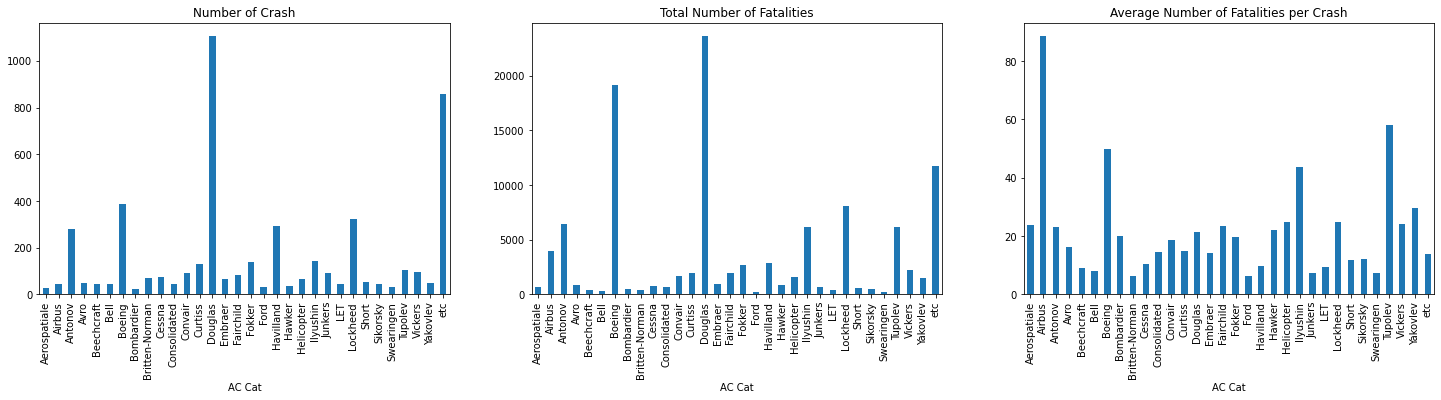

In [6]:
# Add code here
import matplotlib.pyplot as plt

df["AC Cat"] ="etc"

AC_cats={"Fokker":["Fokker"],
         "Douglas":["Douglas"],
         "Boeing":["Boeing"],
         "Ford":["Ford"],
         "Lockheed":["Lockheed"],
         "Antonov":["Antonov"],
         "Airbus":["Airbus"],
         "Havilland":["Havilland"],
         "Yakovlev":["Yakovlev"],
         "Curtiss":["Curtiss"],
         "Junkers":["Junkers"],
         "Beechcraft":["Beechcraft"],
         "Tupolev":["Tupolev"],
         "Fairchild":["Fairchild"],
         "Vickers":["Vickers"],
         "Aerospatiale":["Aerospatiale"],
         "Avro":["Avro"],
         "Bell":["Bell"],
         "Cessna":["Cessna"],
         "Consolidated":["Consolidated"],
         "Convair":["Convair"],
         "Embraer":["Embraer","EMB"],
         "Ilyushin":["Ilyushin"],
         "Sikorsky":["Sikorsky"],
         "Britten-Norman":["Britten","Norman"],
         "Bombardier":["Bombardier","Canadair"],
         "Hawker":["Hawker"],
         "LET":["^let"],
         "Helicopter":["Helicopter"],
         "Short":["Short"],
         "Swearingen":["Swearingen"],
         }

for ac_cat in AC_cats:
  filter=df["AC Type"].str.contains('|'.join(AC_cats[ac_cat]),case=False,regex=True,na=False)
  # print(f"number of {ac_cat}: " , sum(filter==True))
  df.loc[filter, "AC Cat"] = ac_cat

# df[df["AC Cat"]=='etc'][["AC Type","AC Cat"]]
# df.to_csv('new.csv')

fig, axs = plt.subplots(1,3,figsize=(25, 5))
df.groupby("AC Cat").size().plot(kind = "bar",ax=axs[0],title="Number of Crash")
df.groupby("AC Cat")["Fatalities"].sum().plot(kind = "bar",ax=axs[1],title="Total Number of Fatalities")
df.groupby("AC Cat")["Fatalities"].mean().plot(kind = "bar",ax=axs[2],title="Average Number of Fatalities per Crash")
plt.show()

###Task 1.3: Categorize by Year and Time of the Day
* Use plots to visualize:
    1. plot year vs. number of chashes
    2. caterize time of failure into morning, afternoon, evening, and night based on "time".  
    * Hint: you will need to add a new column to the DB to create a new category
* plot bar or pie chart of number of crashes vs time of the day. 
* **Bonus** - Cross correlate year with type of aircraft. For example, the majority of crashes during WWII will be military. Can you identify and explain some other trends?

In [ ]:
#Add code here

###Task 1.4: Perform EDA 
* Read the Advanced exploratory data analysis (EDA) with Python: https://medium.com/p/536fa83c578a
* Apply EDA on your dataset.
  * What else does the EDA tell you about dataset?

In [ ]:
#Add code here

## Task 2: Implement Text Search Analysis
* Implement a text search function that can search for key words in the "summary" and provide all instances that reference the words you are searching for. 
* List all aircraft that crashed due to: 
    1. weather (search by rain, storm..etc), 
    2. shot in combat (search shot)
    3. collision (search collide, collision...)
    4. approach/landing
* **Bonus**:
    * Think of your own categories. What would be useful and why? 
    * Correlate 2 or more keywords. 
* Discuss results, produce graphs or charts if nessary to support your discussion.

referenece: 
https://www.kaggle.com/del=3f79407a7fc1ab98/text-analysis-for-aircraft-crashes-causes/notebook

In [ ]:
#Add code here

## Task 3: Plot Crash on Map


### Task 3.1: Plot Location of the crash on the map
* Plot location of all crashes on the mapG
* Generate heat map based on frequency of crash occurances 
* Cluster area of high crash occurance and categorize them from highest to lowes
* Generate heat map based on the number of fatalities
  * How does it compare to the heat map in 2nd bullet? 
* **Bonus**: Think of your own idea and implement it. What would be useful to add to the map view and why?
* **Hint**: You will first need to convert the "Location" column to longitude and latitude coordinates. Feel free to use any library for this task. However, one way to do this is to use the "geopy" library. 
Note: Geopy does require you to create an account. 

In [ ]:
!pip install geopy

In [ ]:
!git clone https://github.com/DenisCarriere/geocoder
%cd geocoder


In [ ]:
!python setup.py install

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [ ]:
Latitude = "25.594095"
Longitude = "85.137566"
  
location = geolocator.reverse(Latitude+","+Longitude)
  
# Display
print(location)

Patna, Patna Rural, Patna District, Bihar, 800001, India


In [ ]:
from geopy.geocoders import Nominatim
location = geolocator.geocode("175 5th Avenue NYC")
print(location.address)
print((location.latitude, location.longitude))


Flatiron Building, 175, 5th Avenue, Manhattan Community Board 5, New York County, New York, 10010, United States
(40.741059199999995, -73.98964162240998)


In [ ]:
from geopy.geocoders import Nominatim
location = geolocator.geocode("Seattle, Washington")
print(location.address)
print((location.latitude, location.longitude))


Seattle, King County, Washington, United States
(47.6038321, -122.3300624)


In [ ]:
print(df.location[1])

NameError: ignored

In [ ]:
# add code here

###Task 3.2: Plot Trajectories/Routes on Map
* Plot trajectories and routes
* Annotate with the AC registration 
* **Bonus**: Make it selectable such that you can pick such that the use can pick: date range, AC type, operator, registration

Note: If you cannot do it for the entire dataset. Choose a smaller subset.

In [ ]:
# add code here

###Task 3.3: Correlation Location and Weather 
* For each region identify what the key weather words are. 
* Are there some areas that have more crashses due to weather? 
* Can you identify what type of weather? (rain, winds...etc).
* Create confusion matrix (x-weather and y-location)
* **Bonus**: Correlate location with other "key words" (i.e. departure, pilot error..etc)

Note: this part requires combining task 2 and task 3

## Task 4: Implement K-means Clustering 

The purpose of this task is to implement k-means clustering to identify correlations between different parameters identified in the previous tasks (heat map).

###Task 4.1: K-means clustering
* Apply k-means to different groups of data to identify correlations.
* Test different k values
  * Is there an obvios best k?

Reference: 
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

### Task 4.2: K-means Optimization 
* Apply K-means optimization to find the best k-value using 2 different methods: 
  * Elbow method
  * Silhuette method
* Discuss result
  * Which method is better and why?